In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cleaned_crop_production_data.csv')

In [ ]:
df

,year,state_name,district_name,season,crop_name,crop_type,area,area_unit,production,production_unit,yield,yield_unit
0,1998-99,Telangana,Adilabad,Kharif,Arhar/Tur,Pulses,35900.0,Hectare,12700.0,Tonnes,0.35,Tonnes/Hectare
1,1998-99,Telangana,Adilabad,Rabi,Arhar/Tur,Pulses,100.0,Hectare,100.0,Tonnes,1.00,Tonnes/Hectare
2,1998-99,Andhra Pradesh,Anantapur,Kharif,Arhar/Tur,Pulses,27400.0,Hectare,9100.0,Tonnes,0.33,Tonnes/Hectare
3,1998-99,Andhra Pradesh,Chittoor,Kharif,Arhar/Tur,Pulses,6100.0,Hectare,1000.0,Tonnes,0.16,Tonnes/Hectare
4,1998-99,Andhra Pradesh,East Godavari,Kharif,Arhar/Tur,Pulses,2100.0,Hectare,300.0,Tonnes,0.14,Tonnes/Hectare
...,...,...,...,...,...,...,...,...,...,...,...,...
259837,2001-02,Meghalaya,Ri Bhoi,Whole Year,Tapioca,Vegetable,15.0,Hectare,73.0,Tonnes,4.87,Tonnes/Hectare
259838,2001-02,Meghalaya,South Garo Hills,Whole Year,Tapioca,Vegetable,305.0,Hectare,1703.0,Tonnes,5.58,Tonnes/Hectare
259839,2001-02,Meghalaya,West Garo Hills,Whole Year,Tapioca,Vegetable,1111.0,Hectare,5522.0,Tonnes,4.97,Tonnes/Hectare
259840,2001-02,Meghalaya,West Khasi Hills,Whole Year,Tapioca,Vegetable,663.0,Hectare,3402.0,Tonnes,5.13,Tonnes/Hectare


In [ ]:
df.shape

(259842, 12)

In [ ]:
df.dtypes

,0
year,object
state_name,object
district_name,object
season,object
crop_name,object
crop_type,object
area,float64
area_unit,object
production,float64
production_unit,object


In [ ]:
df.isnull().sum()

,0
year,259842
state_name,0
district_name,0
season,0
crop_name,0
crop_type,0
area,0
area_unit,0
production,0
production_unit,0


In [ ]:
df.describe()

,area,production,yield
count,2.598420e+05,2.598420e+05,259842.000000
mean,1.132581e+04,9.700280e+05,80.593897
std,3.793267e+04,2.188560e+07,925.643899
min,0.000000e+00,0.000000e+00,0.000000
25%,7.000000e+01,8.200000e+01,0.570000
50%,5.000000e+02,6.970000e+02,1.050000
75%,3.911000e+03,7.000000e+03,2.600000
max,1.133397e+06,1.597800e+09,43958.330000


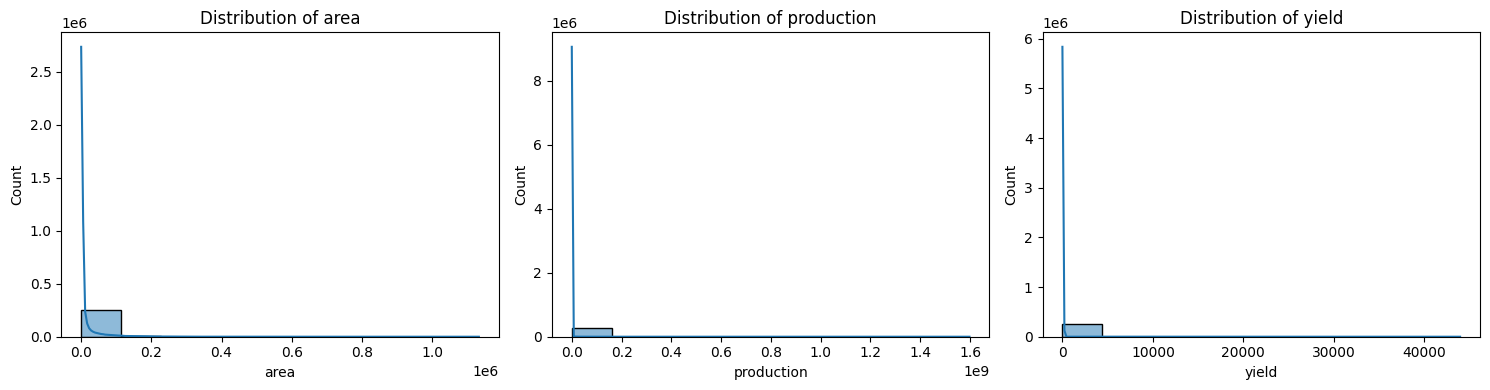

In [ ]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(['area', 'production', 'yield']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

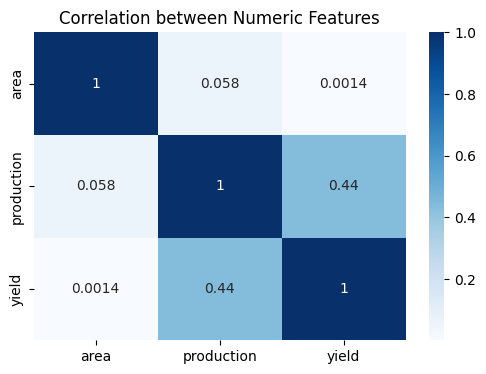

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['area', 'production', 'yield']].corr(), annot=True, cmap='Blues')
plt.title("Correlation between Numeric Features")
plt.show()

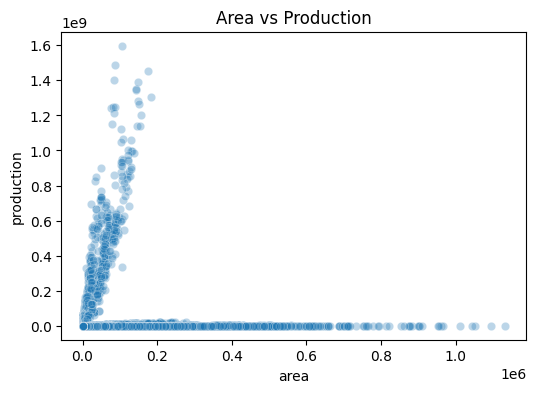

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='area', y='production', data=df, alpha=0.3)
plt.title("Area vs Production")
plt.show()

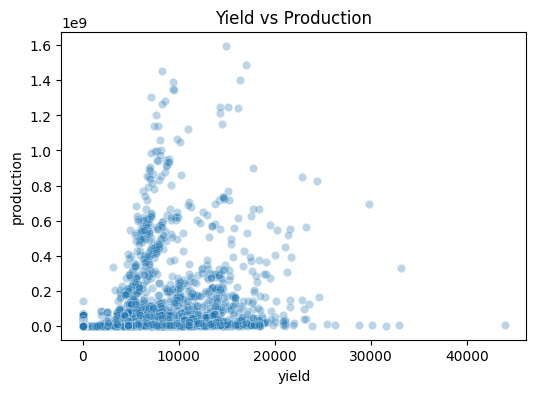

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='yield', y='production', data=df, alpha=0.3)
plt.title("Yield vs Production")
plt.show()

/tmp/ipython-input-661201124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')


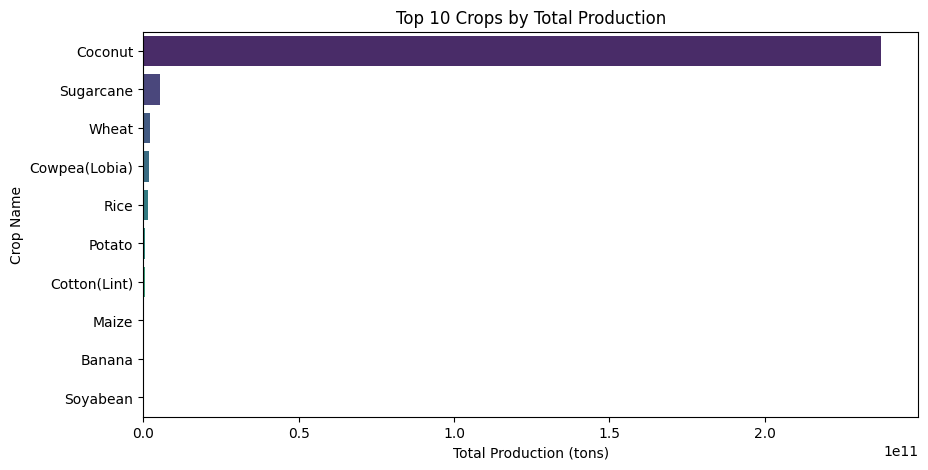

In [ ]:
top_crops = df.groupby('crop_name')['production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')
plt.title("Top 10 Crops by Total Production")
plt.xlabel("Total Production (tons)")
plt.ylabel("Crop Name")
plt.show()

/tmp/ipython-input-3757056429.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='crop_type', y='yield', estimator=np.mean, ci=None, palette='Set2')
/tmp/ipython-input-3757056429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='crop_type', y='yield', estimator=np.mean, ci=None, palette='Set2')


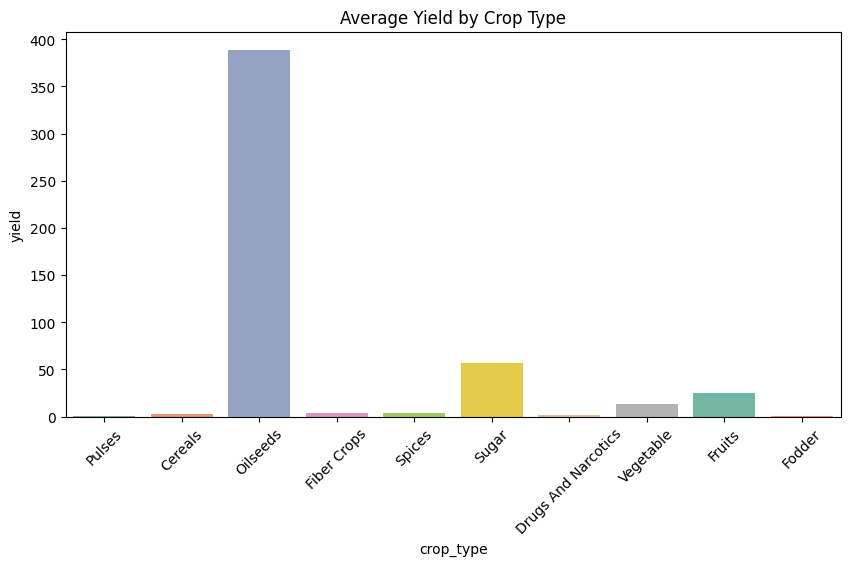

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='crop_type', y='yield', estimator=np.mean, ci=None, palette='Set2')
plt.title("Average Yield by Crop Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['crop_name'].unique()

array(['Arhar/Tur', 'Bajra', 'Castor Seed', 'Cotton(Lint)',
       'Dry Chillies', 'Gram', 'Groundnut', 'Horse-Gram', 'Jowar',
       'Maize', 'Mesta', 'Moong(Green Gram)', 'Other  Rabi Pulses',
       'Other Kharif Pulses', 'Ragi', 'Rice', 'Sesamum', 'Small Millets',
       'Sugarcane', 'Sunflower', 'Tobacco', 'Urad', 'Wheat', 'Ginger',
       'Potato', 'Rapeseed &Mustard', 'Soyabean', 'Turmeric', 'Arecanut',
       'Banana', 'Coconut', 'Jute', 'Linseed', 'Niger Seed', 'Onion',
       'Sweet Potato', 'Tapioca', 'Barley', 'Coriander', 'Garlic',
       'Safflower', 'Sannhamp', 'Masoor', 'Moth', 'Other Cereals',
       'Peas & Beans (Pulses)', 'Black Pepper', 'Cardamom', 'Cashewnut',
       'Other Oilseeds', 'Khesari', 'Guar Seed', 'Cowpea(Lobia)',
       'Other Summer Pulses'], dtype=object)

In [ ]:
df['crop_type'].unique()

array(['Pulses', 'Cereals', 'Oilseeds', 'Fiber Crops', 'Spices', 'Sugar',
       'Drugs And Narcotics', 'Vegetable', 'Fruits', 'Fodder'],
      dtype=object)

In [ ]:
''''df['year'] = df['year'].replace(np.nan, None)  # clear bad values if any
# Force clean conversion
df['year'] = (
    df['year']
    .astype(str)
    .str.extract(r'(19\d{2}|20\d{2})')[0]  # extract years like 1997–2020
    .astype(float)
)''''

In [ ]:
#df.loc[df['year'].isna(), 'year'] = np.random.choice(range(1997, 2021))

In [ ]:
#df['year'].unique()

array([2010])

In [ ]:
#df['year'] = df['year'].astype(int)

/tmp/ipython-input-222591843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_prod.index, y=seasonal_prod.values, palette='coolwarm')


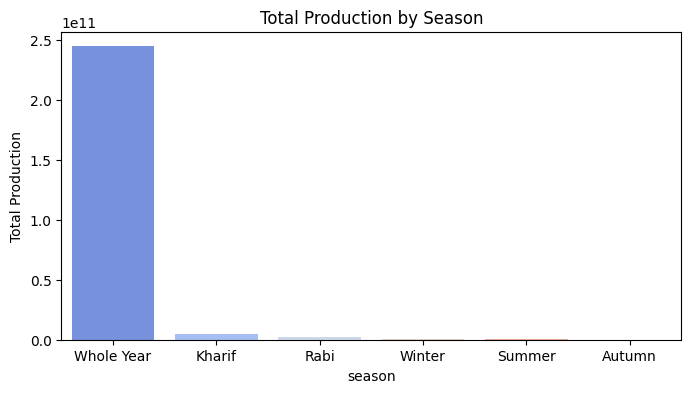

In [ ]:
seasonal_prod = df.groupby('season')['production'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=seasonal_prod.index, y=seasonal_prod.values, palette='coolwarm')
plt.title("Total Production by Season")
plt.ylabel("Total Production")
plt.show()

/tmp/ipython-input-3689416541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_yield.values, y=state_yield.index, palette='crest')


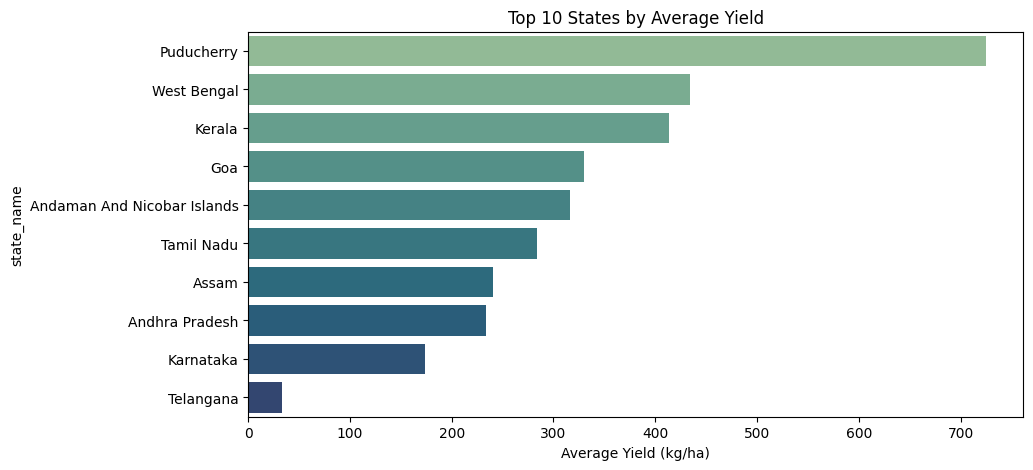

In [ ]:
state_yield = df.groupby('state_name')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=state_yield.values, y=state_yield.index, palette='crest')
plt.title("Top 10 States by Average Yield")
plt.xlabel("Average Yield (kg/ha)")
plt.show()

**Top 10 states by Avg yield**

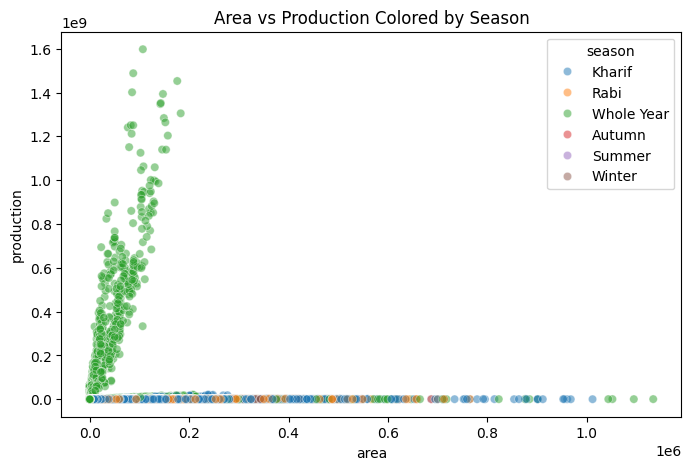

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='production', hue='season', data=df, alpha=0.5)
plt.title("Area vs Production Colored by Season")
plt.show()

**Shows seasonal clustering.
 Kharif crops generally cover larger areas, while Rabi crops have moderate area but stable production.**

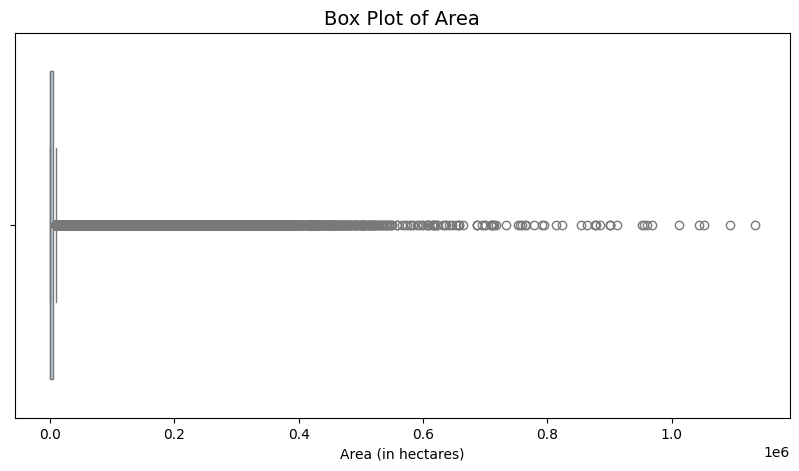

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['area'], color='lightblue')
plt.title("Box Plot of Area", fontsize=14)
plt.xlabel("Area (in hectares)")
plt.show()

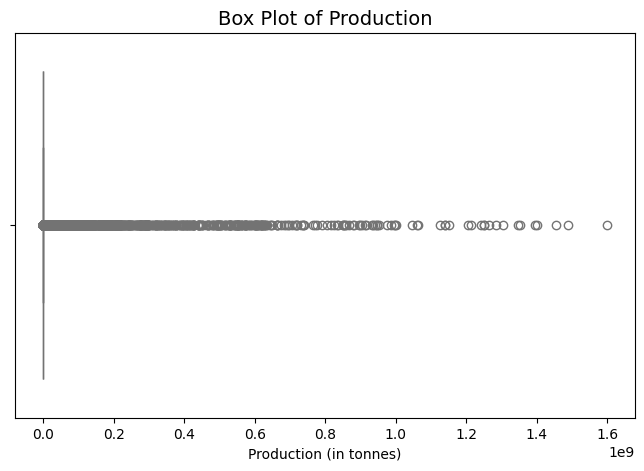

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['production'], color='lightgreen')
plt.title("Box Plot of Production", fontsize=14)
plt.xlabel("Production (in tonnes)")
plt.show()

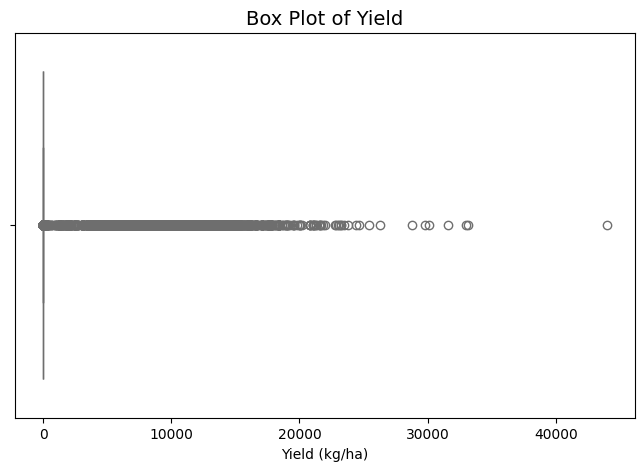

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['yield'], color='lightcoral')
plt.title("Box Plot of Yield", fontsize=14)
plt.xlabel("Yield (kg/ha)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
df = df.drop(columns=["area_unit", "production_unit", "yield_unit",])

KeyError: "['area_unit', 'production_unit', 'yield_unit'] not found in axis"

In [ ]:
df = df.drop(columns=["year", "year_numeric"])

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop(columns=["yield"])
y = df["yield"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

=== Linear Regression Performance on Full Dataset ===
R² Score: 0.2099
Mean Absolute Error (MAE): 166.8507
Root Mean Squared Error (RMSE): 802.0909


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop Factors Affecting Crop Yield:")
print(feature_importance.head(10))



Top Factors Affecting Crop Yield:
         Feature  Coefficient
2         season    85.462483
0     state_name     0.735987
1  district_name     0.039040
6     production     0.000018
5           area    -0.000403
3      crop_name    -5.195082
4      crop_type    -6.119370


**Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 0.9667
Mean Absolute Error (MAE): 6.3125
Root Mean Squared Error (RMSE): 164.7436


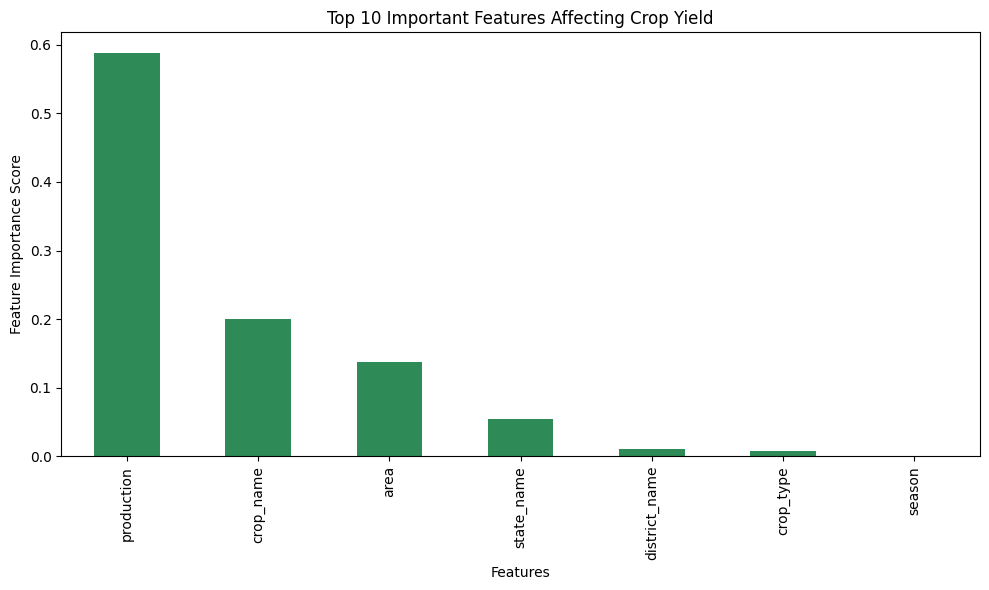

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar', color='seagreen')
plt.title("Top 10 Important Features Affecting Crop Yield")
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
lasso = Lasso(alpha=0.1, random_state=42)
ridge = Ridge(alpha=1.0, random_state=42)

In [ ]:
models = {"Lasso Regression": lasso, "Ridge Regression": ridge}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n=== {name} Performance ===")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


=== Lasso Regression Performance ===
R² Score: 0.2099
Mean Absolute Error (MAE): 166.8060
Root Mean Squared Error (RMSE): 802.0897

=== Ridge Regression Performance ===
R² Score: 0.2099
Mean Absolute Error (MAE): 166.8506
Root Mean Squared Error (RMSE): 802.0909


In [ ]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso Coeff': lasso.coef_,
    'Ridge Coeff': ridge.coef_
})
print("\nFeature Coefficients Comparison:")
print(coeff_df.head(10))


Feature Coefficients Comparison:
         Feature  Lasso Coeff  Ridge Coeff
0     state_name     0.734563     0.735985
1  district_name     0.039040     0.039040
2         season    85.379547    85.462179
3      crop_name    -5.194496    -5.195081
4      crop_type    -6.097493    -6.119329
5           area    -0.000403    -0.000403
6     production     0.000018     0.000018


**Clustering (Unsupervised Learning)**